# 1，展示结果，以各类ETF作为“股票池”

In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [2]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

2023-03-17-10:23:52
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


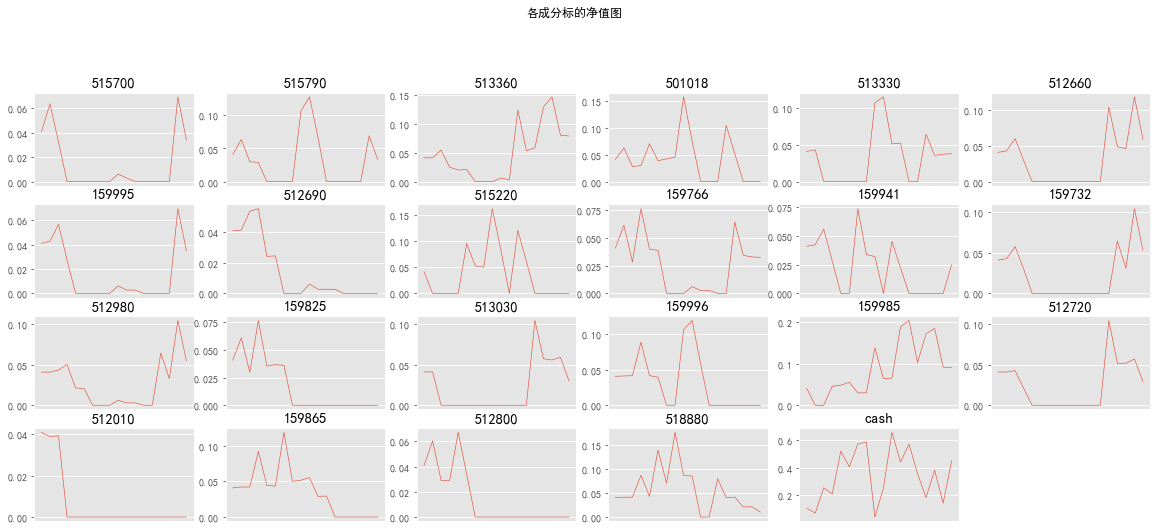

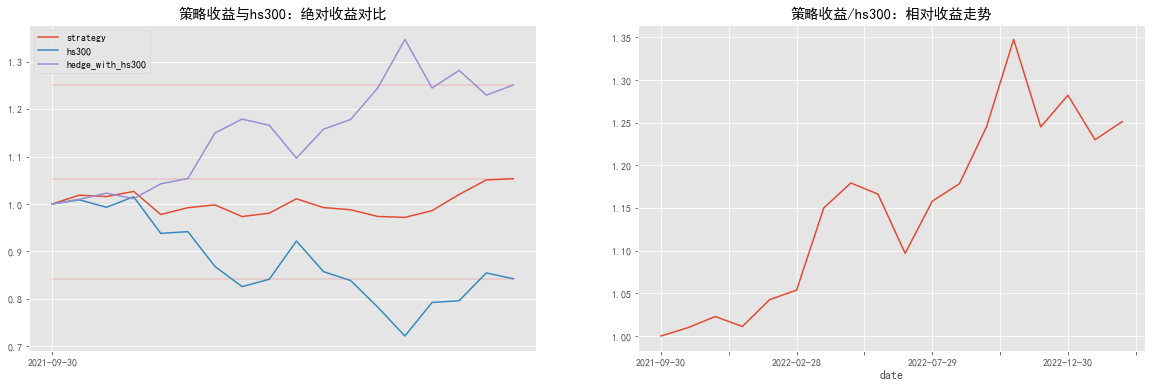

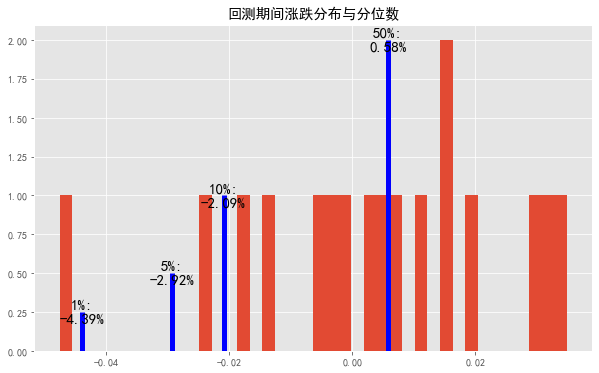

近5日组合净值：
date
2022-10-31    0.971615
2022-11-30     0.98581
2022-12-30    1.020145
2023-01-31    1.050691
2023-02-07     1.05339
dtype: object
近5日组合涨跌：
date
2022-10-31   -0.002002
2022-11-30    0.014610
2022-12-30    0.034830
2023-01-31    0.029943
2023-02-07    0.002569
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.427463  0.000000
159985  0.086175 -0.007028
513360  0.074587 -0.019031
512660  0.055933 -0.006975
512980   0.05222  0.051163
159732  0.049842  0.010029
513330  0.035876  0.018595
159995  0.033226  0.010338
515700  0.032295 -0.017989
515790  0.031524 -0.041420
159766  0.030911 -0.010195
513030   0.02838  0.014612
512720  0.027876  0.033476
159941  0.023594  0.051282
518880    0.0101 -0.014500
159825       0.0 -0.004454
515220       0.0  0.000445
159865       0.0  0.009804
159996       0.0 -0.002727
512800       0.0 -0.024346
512010       0.0 -0.015595
501018       0.0 -0.016623
512690       0.0 -0.007786


In [11]:
am.visualization(control_group='hs300')
# print(am.compare.pct_change().tail(5))

# 2，cv_strategy介绍

## 2.1：底层逻辑与参数介绍

cv，即变异系数，度量数据离散程度的一种方式，表达式如下。可以理解为“围绕平均值的合理波动范围”。例如 cv = 0.1, 即表示“大多数情况下，围绕均值的合理波动范围为±10%”
$$cv = \frac{标准差}{平均值}$$

以动态视角来理解cv：

当cv增加时（dcv > 0），数组有远离均值的趋势，此时如果数组最后一个数高于均值，则可理解为“数组在增长过程中远离均值”此时建议增加该类资产配置。而如果数组最后一个值小于均值，且dcv > 0，则意味着“数组在下降过程中远离均值”，此时建议及时止损。

而当cv减小时（dcv < 0），数组有向均值靠拢的趋势。此时如果最新值大于均值，则意味着上升动能不足，此时选择撤出部分投资，以降低该类资产对整体组合带来的波动。而当最新值小于均值，则意味着资产价格快速下跌的趋势结束，但并不等同于资产价格回升，资产仍有可能缓慢下降或企稳筑底，此时如果选择抄底并不稳妥，建议观望或在有很大把握的情况下适当参与。

据上所述，策略中相应设置了3个参数：


$买入比例：\frac{4}{标的池中标的数量} (默认值，表示“在当前时点，如果标的池中有1/4的标的出现买入信号，则会花光所有现金用于加仓”)$


$收益增强比例：0.5（默认值，表示当上升行情结束后，撤出当前持仓的1/2以降低波动对整体组合的影响）$


$止损比例：1（默认值，表示当资产出现下跌情况后，卖出当前持仓的全部以止损）$

## 2.2：以沪深300指数的可视化说明

In [8]:
import tushare as ts
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
hs300 = ts.get_k_data('hs300').set_index('date')['close']
hs300_ma50 = hs300.rolling(50).mean()
hs300_std50 = hs300.rolling(50).std()
hs300_cv50 = hs300_std50/hs300_ma50

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


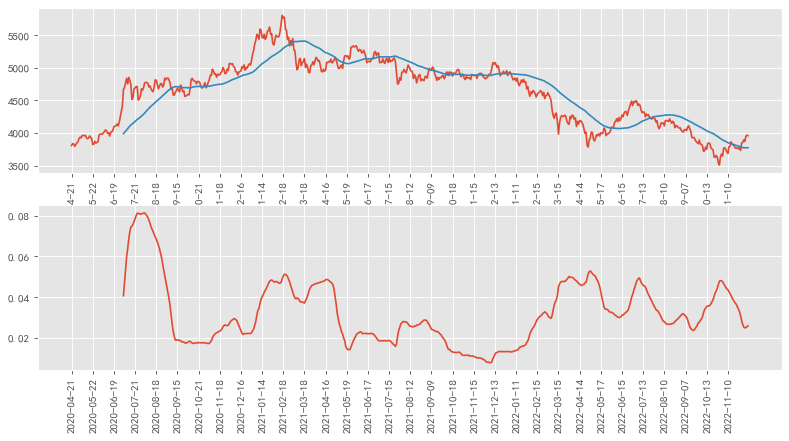

In [16]:
plt.figure(figsize=[12,6],dpi=80)
ax1 = plt.subplot(211)
ax1.plot(hs300)
ax1.plot(hs300_ma50)
ax1.set_xticks(hs300.index[::20])
ax1.set_xticklabels(hs300.index[::20],rotation=90)

ax2=plt.subplot(212,sharex=ax1)
ax2.plot(hs300_cv50)
ax2.set_xticks(hs300.index[::20])
ax2.set_xticklabels(hs300.index[::20],rotation=90)

plt.show()

# 3，经cv_strategy优化后的曲线：

对难以控制的资产类别可降低波动率；对强势的资产不仍有较好收益；对风险较大的资产可及时撤出

以沪深300指数、比亚迪（002594）、恒瑞医药（600276）为例，可以明显看出策略对于控制波动方面有显著作用

## 3.1：对难以把握的资产：降低波动、增加可控性：沪深300指数

In [175]:
pool=['399372','399373','399374','399375','399376','399377']
test_pool = [pool]
test = cv_strategy.cv_strategy(pool)
test.get_close(date_start = '2017-04-01',ktype_='D')

2023-03-24-11:26:47
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


2017-06-19
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
买——追涨： 399373
2017-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-07-03
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-07-04
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-19
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-24
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-31
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-02-01
无操作: 399372
卖——割肉： 399374
无操作: 399376
卖——逃顶： 399377
卖——逃顶： 399375
无操作: 399373
2018-02

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-05
无操作:

无操作: 399372
无操作: 399374
无操作: 399376
买——追涨： 399377
无操作: 399375
买——追涨： 399373
2018-11-20
无操作: 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
卖——逃顶： 399373
2018-11-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
卖——割肉： 399373
2018-11-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-12-03
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-12-04
无操作: 399372
无操作: 399374
买——追涨： 399376
买——追涨： 399377
买——追涨： 399375
无操作: 3993

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-04-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-04-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-07
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-09
无操作: 399372
卖——割肉： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-10
卖——割肉： 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
卖——割肉： 399373
2019-05-13
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-14
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-16
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05

2019-11-21
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
卖——割肉： 399373
2019-11-22
卖——割肉： 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-05
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-06
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作:

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-19
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2020-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2020-06-24
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-29
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
无操作: 399373
2020-06-30
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-01
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
买——追涨： 399373
2020-07-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 3993

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-25
卖——逃顶： 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-26
无操作: 399372
卖——逃顶： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-27
无操作: 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-01
买——追涨： 399372
买——追涨： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-03
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-07
买——追涨： 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
无操作: 399373
2020-12-08
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2020-12-09
无操作: 399372
卖——逃顶： 399374
卖——逃顶： 399376
无操作: 399377
买——追涨： 39

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2021-06-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2021-06-07
卖——逃顶： 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
无操作: 399373
2021-06-08
无操作: 399372
卖——逃顶： 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-10
无操作: 399372
买——追涨： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-11
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
无操作: 399373
2021-06-16
无操作: 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-17
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-18
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-21
卖——逃顶： 399372
无操作: 399374
买——追涨： 399376
无操作: 399377
无操作: 399375

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-02
无操作: 399372
无操作: 399374
无操作: 399376
卖——割肉： 399377
卖——割肉： 399375
无操作: 399373
2021-11-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-04
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-05
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-09
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-11
买——追涨： 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-12
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-15
卖——逃顶： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-16
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 39

2022-06-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-13
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2022-06-14
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-16
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
卖——逃顶： 399373
2022-06-17
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-23
无操作: 399372
无操作: 399374
买——追涨： 399376
无操作: 399377
无操作: 399375


无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-05
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-11
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-12
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-13
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-16
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-17
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-19
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2023-01-2

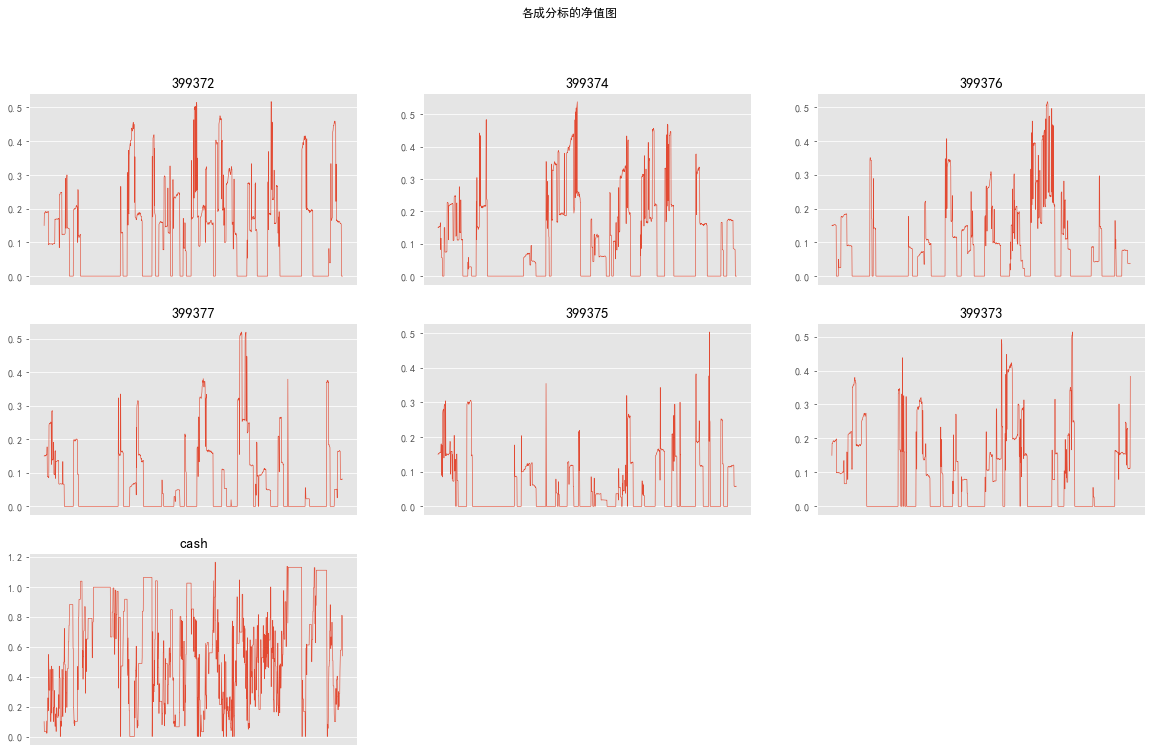

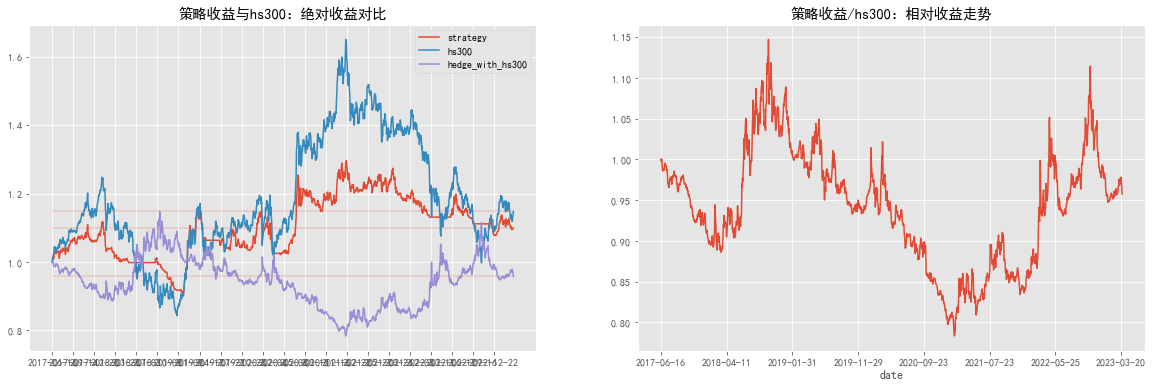

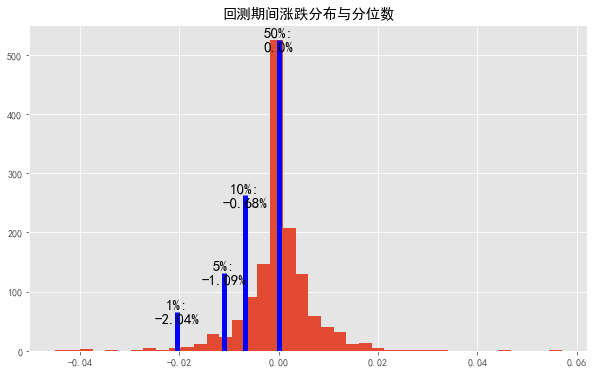

近5日组合净值：
date
2023-03-17    1.096937
2023-03-20     1.09522
2023-03-21    1.096066
2023-03-22    1.097567
2023-03-23    1.099188
dtype: object
近5日组合涨跌：
date
2023-03-17    0.002388
2023-03-20   -0.001565
2023-03-21    0.000772
2023-03-22    0.001370
2023-03-23    0.001478
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash     0.49043  0.000000
399373   0.34845  0.009809
399377  0.074034  0.000770
399375  0.052869  0.005308
399376  0.034217  0.006189
399372       0.0  0.011261
399374       0.0  0.010710


In [179]:
test.run(operation_pct_in=1/3,operation_pct_out=.5,operation_pct_clr=1,period=50,)
test.visualization(control_group='hs300')

## 3.2：对强势资产：降低波动同时对收益影响不大：比亚迪

In [31]:
test_pool = ['002594']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(date_start='2019-01-01')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2022-12-08-10:02:02
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2019-03-20
买——追涨： 002594
2019-03-21
无操作: 002594
2019-03-22
无操作: 002594
2019-03-25
无操作: 002594
2019-03-26
无操作: 002594
2019-03-27
无操作: 002594
2019-03-28
卖——逃顶： 002594
2019-03-29
无操作: 002594
2019-04-01
无操作: 002594
2019-04-02
无操作: 002594
2019-04-03
无操作: 002594
2019-04-04
无操作: 002594
2019-04-08
无操作: 002594
2019-04-09
无操作: 002594
2019-04-10
无操作: 002594
2019-04-11
无操作: 002594
2019-04-12
无操作: 002594
2019-04-15
无操作: 002594
2019-04-16
无操作: 002594
2019-04-17
买——追涨： 002594
2019-04-18
卖——逃顶： 002594
2019-04-19
无操作: 002594
2019-04-22
无操作: 002594
2019-04-23
无操作: 002594
2019-04-24
无操作: 002594
2019-04-25
无操作: 002594
2019-04-26
无操作: 002594
2019-04-29
无操作: 002594
2019-04-30
无操作: 002594
2019-05-06
无操作: 002594
2019-05-07
无操作: 002594
2019-05-08
卖——割肉： 002594
2019-05-09
无操作: 002594
2019-05-10
无操作: 002594
2019-05-13
无操作: 002594
2019-05-14
无操作: 002594
2019-05-15
无操作: 002594
2019-05-16
无操作:

无操作: 002594
2020-09-09
无操作: 002594
2020-09-10
无操作: 002594
2020-09-11
无操作: 002594
2020-09-14
买——追涨： 002594
2020-09-15
无操作: 002594
2020-09-16
无操作: 002594
2020-09-17
无操作: 002594
2020-09-18
无操作: 002594
2020-09-21
无操作: 002594
2020-09-22
无操作: 002594
2020-09-23
无操作: 002594
2020-09-24
无操作: 002594
2020-09-25
无操作: 002594
2020-09-28
无操作: 002594
2020-09-29
无操作: 002594
2020-09-30
无操作: 002594
2020-10-09
无操作: 002594
2020-10-12
无操作: 002594
2020-10-13
无操作: 002594
2020-10-14
无操作: 002594
2020-10-15
无操作: 002594
2020-10-16
无操作: 002594
2020-10-19
无操作: 002594
2020-10-20
无操作: 002594
2020-10-21
无操作: 002594
2020-10-22
无操作: 002594
2020-10-23
无操作: 002594
2020-10-26
无操作: 002594
2020-10-27
无操作: 002594
2020-10-28
无操作: 002594
2020-10-29
无操作: 002594
2020-10-30
无操作: 002594
2020-11-02
无操作: 002594
2020-11-03
无操作: 002594
2020-11-04
无操作: 002594
2020-11-05
无操作: 002594
2020-11-06
无操作: 002594
2020-11-09
无操作: 002594
2020-11-10
无操作: 002594
2020-11-11
卖——逃顶： 002594
2020-11-12
无操作: 002594
2020-11-13
无操作: 002594
2020-11-16
无操作: 00

无操作: 002594
2022-07-19
无操作: 002594
2022-07-20
无操作: 002594
2022-07-21
无操作: 002594
2022-07-22
无操作: 002594
2022-07-25
无操作: 002594
2022-07-26
无操作: 002594
2022-07-27
无操作: 002594
2022-07-28
无操作: 002594
2022-07-29
无操作: 002594
2022-08-01
无操作: 002594
2022-08-02
无操作: 002594
2022-08-03
无操作: 002594
2022-08-04
无操作: 002594
2022-08-05
无操作: 002594
2022-08-08
无操作: 002594
2022-08-09
无操作: 002594
2022-08-10
无操作: 002594
2022-08-11
无操作: 002594
2022-08-12
无操作: 002594
2022-08-15
卖——割肉： 002594
2022-08-16
无操作: 002594
2022-08-17
无操作: 002594
2022-08-18
无操作: 002594
2022-08-19
无操作: 002594
2022-08-22
无操作: 002594
2022-08-23
无操作: 002594
2022-08-24
无操作: 002594
2022-08-25
无操作: 002594
2022-08-26
无操作: 002594
2022-08-29
无操作: 002594
2022-08-30
无操作: 002594
2022-08-31
无操作: 002594
2022-09-01
无操作: 002594
2022-09-02
无操作: 002594
2022-09-05
无操作: 002594
2022-09-06
无操作: 002594
2022-09-07
无操作: 002594
2022-09-08
无操作: 002594
2022-09-09
无操作: 002594
2022-09-13
无操作: 002594
2022-09-14
无操作: 002594
2022-09-15
无操作: 002594
2022-09-16
无操作: 0025

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


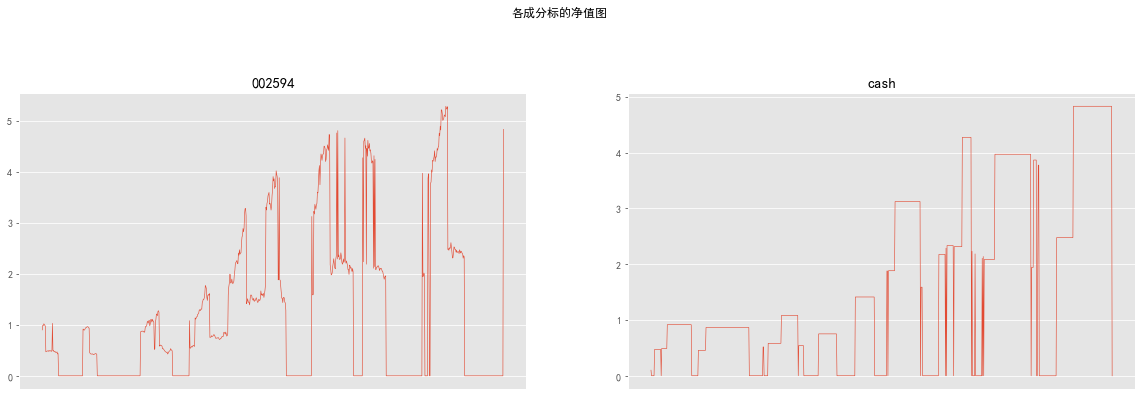

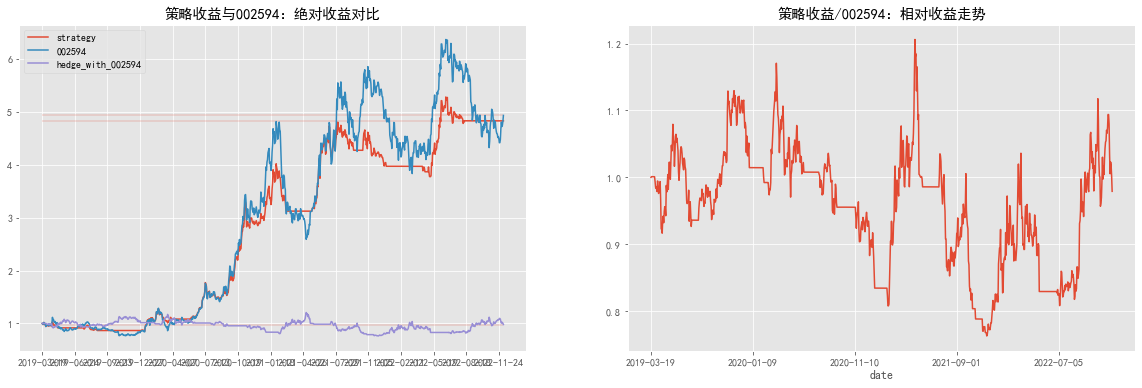

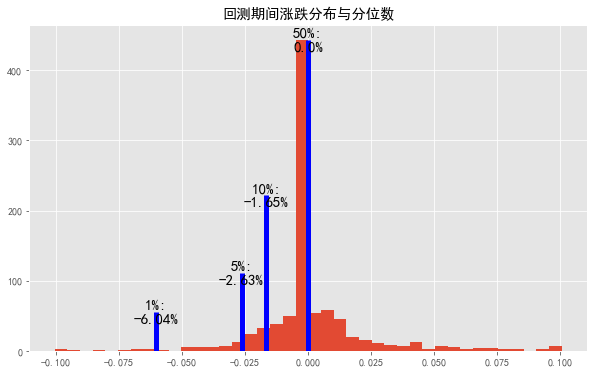

近5日组合净值：
date
2022-12-01    4.832893
2022-12-02    4.832893
2022-12-05    4.832893
2022-12-06    4.832893
2022-12-07    4.831443
dtype: object
近5日组合涨跌：
date
2022-12-01    0.0000
2022-12-02    0.0000
2022-12-05    0.0000
2022-12-06    0.0000
2022-12-07   -0.0003
dtype: float64
今日持仓比例与涨跌幅：
            仓位      今日涨幅
002594  1.0003  0.022945
cash   -0.0003  0.000000


In [32]:
test.visualization(control_group='002594')

## 3.3：对弱势资产：有限参与，保证安全：恒瑞医药

In [39]:
test_pool = ['600276']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(ktype_='D')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2022-12-08-12:12:27
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2020-07-07
买——追涨： 600276
2020-07-08
无操作: 600276
2020-07-09
无操作: 600276
2020-07-10
无操作: 600276
2020-07-13
无操作: 600276
2020-07-14
无操作: 600276
2020-07-15
无操作: 600276
2020-07-16
卖——逃顶： 600276
2020-07-17
买——追涨： 600276
2020-07-20
无操作: 600276
2020-07-21
无操作: 600276
2020-07-22
无操作: 600276
2020-07-23
无操作: 600276
2020-07-24
卖——逃顶： 600276
2020-07-27
无操作: 600276
2020-07-28
无操作: 600276
2020-07-29
无操作: 600276
2020-07-30
无操作: 600276
2020-07-31
无操作: 600276
2020-08-03
无操作: 600276
2020-08-04
无操作: 600276
2020-08-05
无操作: 600276
2020-08-06
无操作: 600276
2020-08-07
无操作: 600276
2020-08-10
无操作: 600276
2020-08-11
无操作: 600276
2020-08-12
无操作: 600276
2020-08-13
无操作: 600276
2020-08-14
无操作: 600276
2020-08-17
无操作: 600276
2020-08-18
无操作: 600276
2020-08-19
无操作: 600276
2020-08-20
无操作: 600276
2020-08-21
无操作: 600276
2020-08-24
无操作: 600276
2020-08-25
无操作: 600276
2020-08-26
无操作: 600276
2020-08-27
无操作: 6

无操作: 600276
2021-12-29
无操作: 600276
2021-12-30
无操作: 600276
2021-12-31
无操作: 600276
2022-01-04
无操作: 600276
2022-01-05
无操作: 600276
2022-01-06
无操作: 600276
2022-01-07
无操作: 600276
2022-01-10
无操作: 600276
2022-01-11
无操作: 600276
2022-01-12
无操作: 600276
2022-01-13
无操作: 600276
2022-01-14
无操作: 600276
2022-01-17
无操作: 600276
2022-01-18
无操作: 600276
2022-01-19
无操作: 600276
2022-01-20
无操作: 600276
2022-01-21
无操作: 600276
2022-01-24
无操作: 600276
2022-01-25
无操作: 600276
2022-01-26
无操作: 600276
2022-01-27
无操作: 600276
2022-01-28
无操作: 600276
2022-02-07
无操作: 600276
2022-02-08
无操作: 600276
2022-02-09
无操作: 600276
2022-02-10
无操作: 600276
2022-02-11
无操作: 600276
2022-02-14
无操作: 600276
2022-02-15
无操作: 600276
2022-02-16
无操作: 600276
2022-02-17
无操作: 600276
2022-02-18
无操作: 600276
2022-02-21
无操作: 600276
2022-02-22
无操作: 600276
2022-02-23
无操作: 600276
2022-02-24
无操作: 600276
2022-02-25
无操作: 600276
2022-02-28
无操作: 600276
2022-03-01
无操作: 600276
2022-03-02
无操作: 600276
2022-03-03
无操作: 600276
2022-03-04
无操作: 600276
2022-03-07
无操作: 600276

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


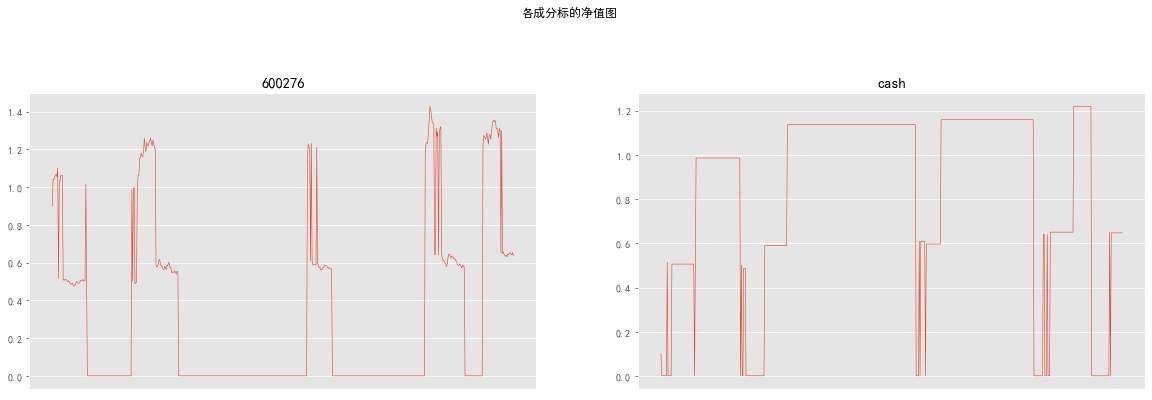

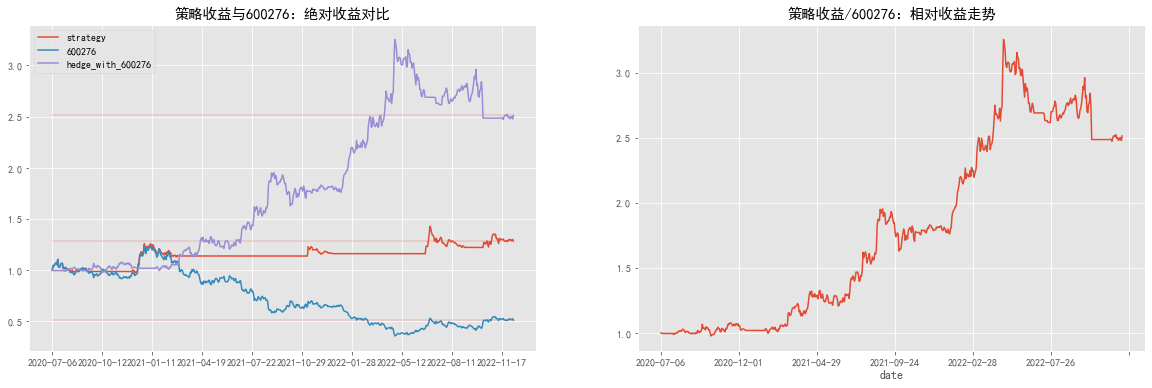

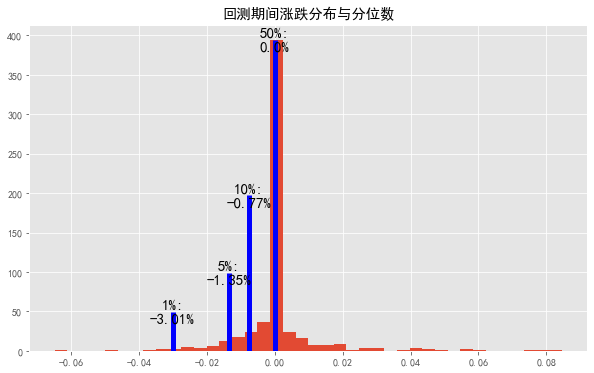

近5日组合净值：
date
2022-12-02    1.300025
2022-12-05    1.290043
2022-12-06    1.290043
2022-12-07    1.301313
2022-12-08    1.283603
dtype: object
近5日组合涨跌：
date
2022-12-02    0.000372
2022-12-05   -0.007678
2022-12-06    0.000000
2022-12-07    0.008736
2022-12-08   -0.013610
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.504803  0.000000
600276  0.495197 -0.027107


In [40]:
test.visualization(control_group='600276')

# 4，总结

基于变异系数的策略cv_strategy通过判断一个周期内的波动变化$\frac{dcv}{dt}$结合最新资产价格与过去一段时间的均值的大小关系来推测未来的资产价格走势，对波动增强且价格高于均值的资产超配，对波动增加且价格低于均值的资产减配，其他情况则维持安全的持仓比例，即“半仓吃瓜”

策略对于风格变化快、难以把握的资产类型可以降低其波动幅度，从而减小该资产对整体组合的影响；

策略对于强势的资产，能同时起到降低波动幅度和争取收益的效果；

策略对于弱势的资产，能起到控制最大回撤，减少参与、避免踩雷的效果。

当股票池足够丰富，策略的胜率也会随之提升。

In [119]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.close.loc[:'2022-12-26','515220'] = am.close.loc[:'2022-12-26','515220']/2.187*2.147

am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

a = cv_strategy.cv_strategy(pool_1)
a.get_close(ktype_='D')
a.close.loc['2022-07-05':,'159941']=a.close.loc['2022-07-05':,'159941']/0.604*2.416
a.close.loc[:'2021-05-14','512690'] = a.close.loc[:'2021-05-14','512690']/2.644*0.972
a.close.loc['2021-05-15':'2021-12-30','512690'] = a.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
a.close.loc[:'2021-06-25','512010'] = a.close.loc[:'2021-06-25','512010']/3.206*0.836
a.close.loc[:'2022-12-26','515220'] = a.close.loc[:'2022-12-26','515220']/2.187*2.147

a.run()

2023-04-20-15:03:26
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
<urlopen error timed out>
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
<urlopen error timed out>
<urlopen error timed out>
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
<urlopen error timed out>
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

<urlopen error timed out>
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2021-11-30
卖——割肉： 513360
卖——割肉： 513330
买——追涨： 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
卖——割肉： 515220
无操作: 512720
买——追涨： 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
卖——割肉： 513030
卖——割肉： 159985
无操作: 159825
卖——割肉： 512800
卖——割肉： 518880
2021-12-01
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2021-12-02
无操作: 513360
无操作: 513330
无操作: 515700
买——追涨： 512690
无操作: 512980
卖——割肉： 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
卖——割肉： 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 

无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
买——追涨： 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
买——追涨： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-02-21
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-02-22
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-02-23
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
卖——逃顶： 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无

买——追涨： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-04-01
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
卖——逃顶： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-04-06
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
买——追涨： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
买——追涨： 512800
无操作: 518880
2022-04-07
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
卖——逃顶： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
卖——逃顶： 512800
无操作: 518880
2022-04-08
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515

2022-06-27
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-06-28
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-06-29
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
卖——逃顶： 501018
无操作: 512010
卖——逃顶： 512660
无操作: 159766
无操作: 159941
卖——逃顶： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-06-30
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
买——追涨： 512660


买——追涨： 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
卖——逃顶： 159941
无操作: 159865
无操作: 159996
无操作: 513030
买——追涨： 159985
卖——割肉： 159825
无操作: 512800
无操作: 518880
2022-09-13
卖——逃顶： 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-09-14
买——追涨： 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-09-15
卖——逃顶： 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
卖——割肉： 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作

无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-12-06
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
卖——逃顶： 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-12-07
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
买——追涨： 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
卖——逃顶： 518880
2022-12-08
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2022-12-09
无操作: 513360
买——追涨： 513330
无操作: 515700
买——追涨： 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 51522

买——追涨： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-02-21
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-02-22
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
卖——逃顶： 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-02-23
无操作: 513360
无操作: 513330
卖——割肉： 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
买——追涨： 515220
无操作: 512720
无操作: 159732
无操作: 501018
卖——逃顶： 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-02-24
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 51579

卖——割肉： 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
买——追涨： 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
卖——逃顶： 159941
卖——逃顶： 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-04-07
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
无操作: 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
买——追涨： 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-04-10
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
卖——逃顶： 512720
卖——逃顶： 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作: 159766
无操作: 159941
无操作: 159865
无操作: 159996
无操作: 513030
无操作: 159985
无操作: 159825
无操作: 512800
无操作: 518880
2023-04-11
无操作: 513360
无操作: 513330
无操作: 515700
无操作: 512690
无操作: 512980
无操作: 515790
无操作: 159995
无操作: 515220
买——追涨： 512720
无操作: 159732
无操作: 501018
无操作: 512010
无操作: 512660
无操作

In [120]:
startdate='2023-03-31'
dec_dailyreturn = a.returns.dropna().loc[startdate:]
df_model = a.weight.loc[am.weight.iloc[-2].name:]
df = pd.DataFrame(index = df_model.index,columns=df_model.columns)
df.iloc[0,:] = am.weight.iloc[-2][df.columns]

In [121]:
#####
for i in range(1,len(df)):

    df.iloc[i,:] = df.iloc[i-1,:]*(1+dec_dailyreturn.iloc[i,:])[df.columns]
    
    
###########
dfsum = pd.DataFrame(df.T.sum(),columns=['cv_m'])
hs300 = ts.get_k_data('hs300').set_index('date')
hs300 = hs300.loc[startdate:,'close']
dfs = pd.concat([df.T.sum(),hs300],axis=1)
dfs.columns=['cv_m','hs300']
dfs=dfs/dfs.iloc[0]

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


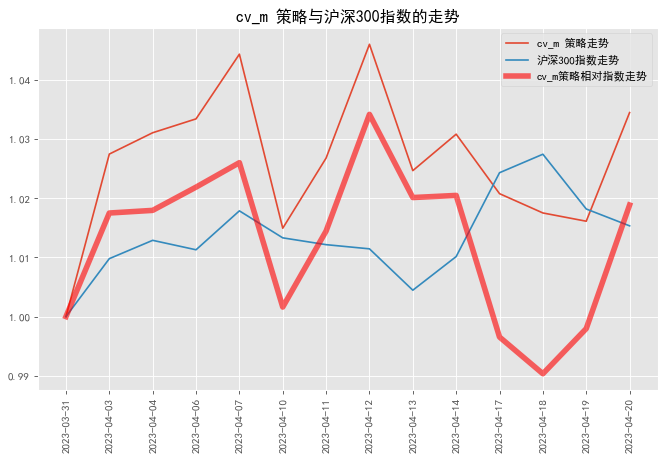

In [122]:
plt.style.use('ggplot')
plt.figure(figsize=[10,6],dpi=80)
plt.title('cv_m 策略与沪深300指数的走势')
plt.plot(dfs.cv_m,label='cv_m 策略走势')
plt.plot(dfs.hs300,label='沪深300指数走势')
plt.plot(dfs.cv_m/dfs.hs300,lw=5,alpha=0.6,color='red',label='cv_m策略相对指数走势')
plt.xticks(dfs.index,rotation=90)
plt.legend()
plt.show()

In [123]:
dfs.pct_change()

,cv_m,hs300
date,,
2023-03-31,NaN,NaN
2023-04-03,0.027451,0.009785
2023-04-04,0.003507,0.003066
2023-04-06,0.002273,-0.001577
2023-04-07,0.010573,0.006503
2023-04-10,-0.028148,-0.004479
2023-04-11,0.011675,-0.001135
2023-04-12,0.018717,-0.000698
2023-04-13,-0.020404,-0.006909


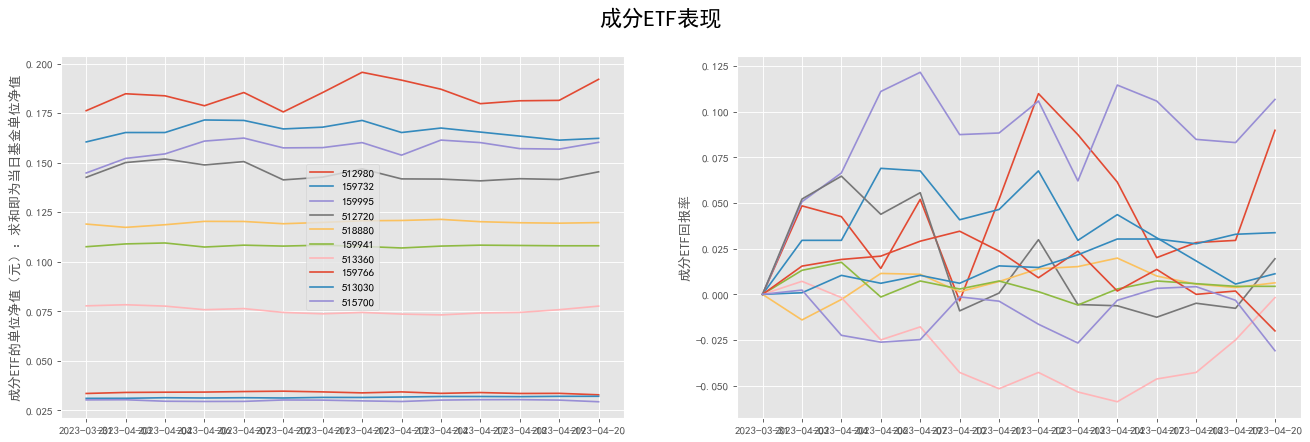

In [124]:
pt = df.T.sort_values(startdate,ascending=False).iloc[:11].T
aa = pt.columns.to_list()
aa.remove('cash')
pt=pt[aa]
fig = plt.figure(figsize=[20,6],dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('成分ETF的单位净值（元）：求和即为当日基金单位净值')
for i in pt.columns:
    if i != 'cash':
        ax1.plot(pt[i],label=i)
    
ax1.legend()
ax2=plt.subplot(122)
ax2.plot((pt/pt.iloc[0])-1)
ax2.set_ylabel('成分ETF回报率')

fig.suptitle('成分ETF表现',fontsize=20)
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


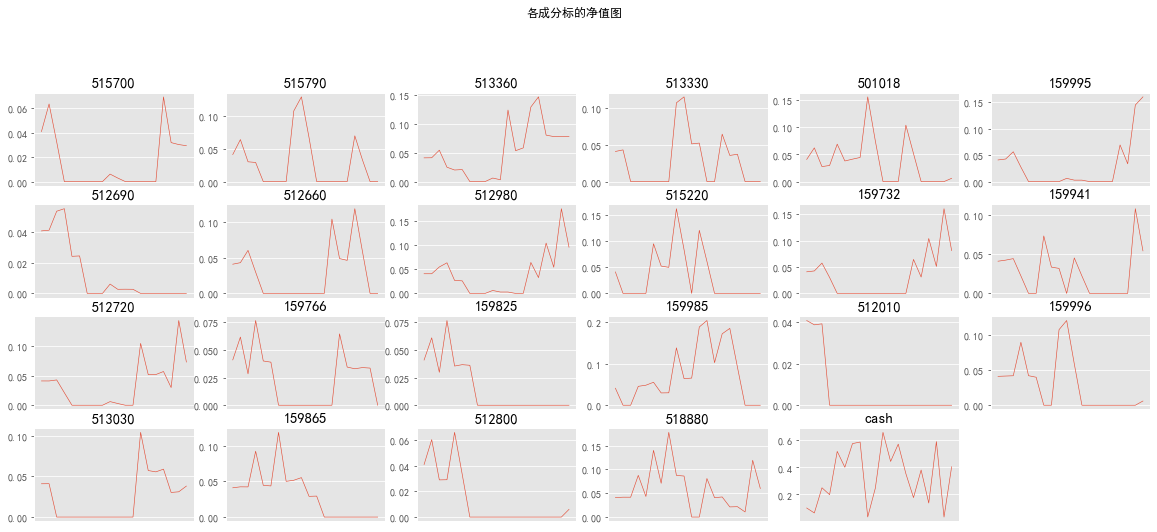

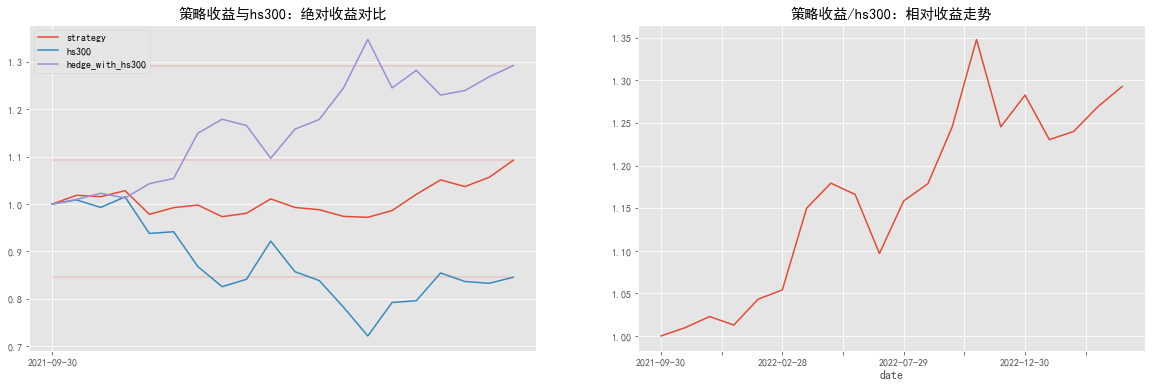

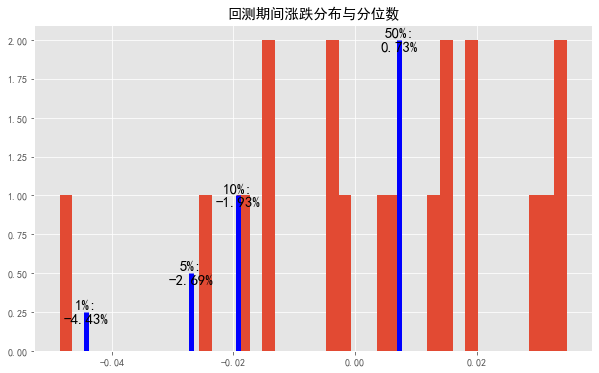

近5日组合净值：
date
2022-12-30    1.020532
2023-01-31    1.051083
2023-02-28    1.036962
2023-03-31    1.056453
2023-04-20    1.092734
dtype: object
近5日组合涨跌：
date
2022-12-30    0.034843
2023-01-31    0.029936
2023-02-28   -0.013434
2023-03-31    0.018796
2023-04-20    0.034342
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.371142  0.000000
159995   0.14668  0.106737
512980  0.087899  0.089835
159732  0.074266  0.011268
513360  0.071034 -0.001783
512720  0.066535  0.019485
518880  0.054811  0.006307
159941  0.049451  0.004386
513030  0.034871  0.033766
515700   0.02686 -0.030870
512800  0.005484  0.044762
501018  0.005484  0.050551
159996  0.005484  0.028777
159766       0.0 -0.020018
512660       0.0  0.000917
159985       0.0 -0.030675
159825       0.0 -0.028969
512010       0.0  0.002128
513330       0.0 -0.071429
515220       0.0  0.001357
515790       0.0 -0.039523
159865       0.0 -0.029888
512690       0.0 -0.088043


In [125]:
am.visualization(control_group='hs300')

---

2023-02-23-13:21:25
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽

<ipython-input-146-493c1a615878>:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(2,2,j)


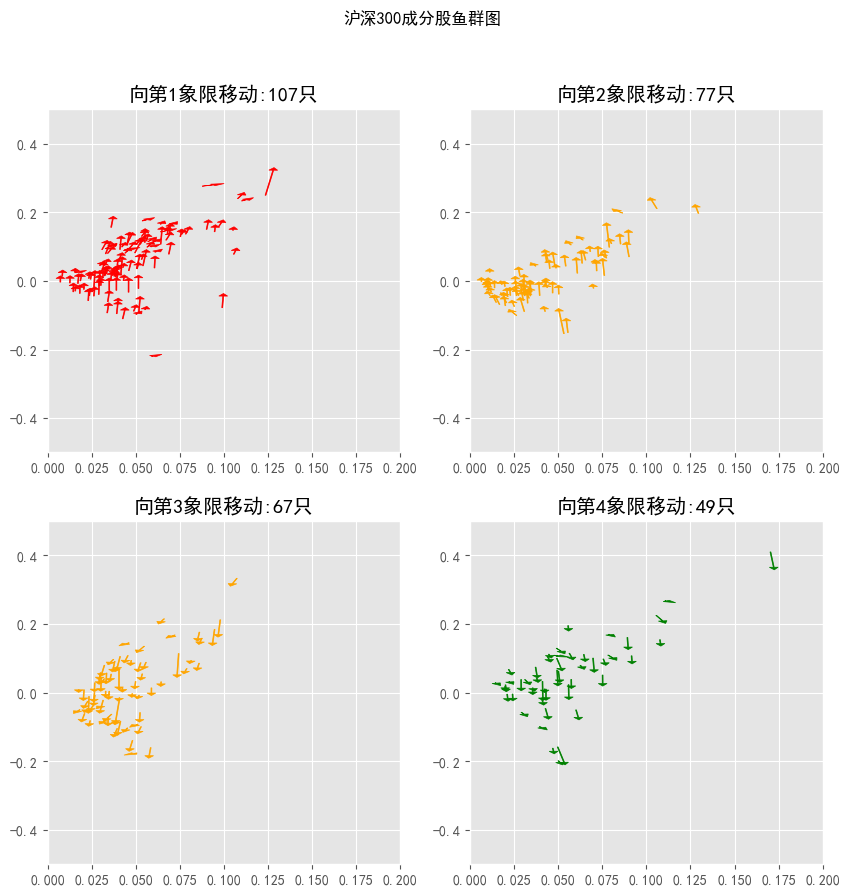

In [146]:
hs300_list = pd.read_excel(r'./hs300.xlsx',sheet_name=1).dropna()
hs300_list = [i[:6] for i in hs300_list['证券代码']]
hs300_pool = cv_strategy.cv_strategy(hs300_list)
hs300_pool.get_close()
area = hs300_pool.close
prd = 50
cv = area.rolling(prd).std()/area.rolling(prd).mean()
cv.dropna(inplace=True)
cv = cv.iloc[1:]
rtn = area/area.shift(prd)
rtn.dropna(inplace=True)
rtn = rtn.applymap(lambda x:np.log(x))
# fig = plt.figure(figsize=[10,10],dpi=80)
# ax1 = plt.subplot()
# # ax1.scatter(x = cv.iloc[-1],y = rtn.iloc[-1],alpha=.6,marker='o')
# # ax1.scatter(x = cv.iloc[-2],y = rtn.iloc[-2],alpha=.6,marker='o')
# for i in range(len(cv.iloc[-1])):
#     ax1.arrow(x=cv.iloc[-2,i], y=rtn.iloc[-2,i], dx = cv.iloc[-1,i]-cv.iloc[-2,i],dy = rtn.iloc[-1,i]-rtn.iloc[-2,i],
#               length_includes_head=True,width=0.0005,head_width=0.003)
# plt.scatter(x2,np.log(y2),alpha=0.2)
dcv = cv-cv.shift(1)
dcv.dropna(inplace=True)
# dcv = dcv.iloc[1:]
drtn=rtn-rtn.shift(1)
drtn.dropna(inplace=True)
vel = pd.DataFrame(columns=dcv.columns,index=dcv.index)
for i in range(len(dcv.columns)):
    for j in range(len(dcv.index)):
        if dcv.iloc[j,i]>0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 1
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 2
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 3
        elif dcv.iloc[j,i]>0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 4


# aset = cv.iloc[-1][cv.iloc[-1]>0].index.to_list()
# bset = rtn.iloc[-1][rtn.iloc[-1]>0].index.to_list()
# area_1 = [i for i in aset if i in bset]
# x = cv.iloc[-1][area_1]
# y = rtn.iloc[-1][area_1]
# plt.scatter(x=x,y=y)
fig=plt.figure(figsize=[10,10],dpi=100)
fig.suptitle('沪深300成分股鱼群图')
colors = ['red','orange','orange','green']
for j in range(1,5):
    a1 = (vel.iloc[-1][vel.iloc[-1]==j]).index
    a1x=cv[a1].iloc[-2]
    a1y=rtn[a1].iloc[-2]
    a1dx=dcv[a1].iloc[-1]
    a1dy=drtn[a1].iloc[-1]
    for i in range(len(a1)):
        ax=plt.subplot(2,2,j)
        ax.set_xlim(0,.2)
        ax.set_ylim(-.5,.5)
        ax.arrow(x=a1x[i],y=a1y[i],dx=a1dx[i],dy=a1dy[i],width=0.0005,head_width=0.005,color=colors[j-1])
        ax.set_title('向第{}象限移动:{}只'.format(j,len(a1)))

In [159]:
frames = len(cv)
data = [(cv.iloc[i], rtn.iloc[i]) for i in range(frames)]

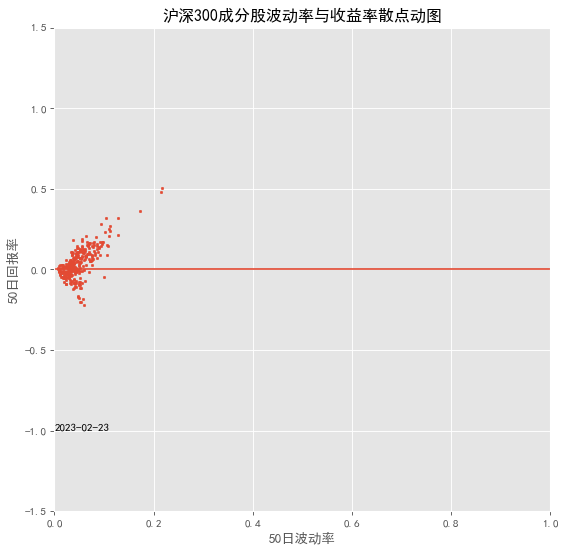

In [160]:
fig = plt.figure(figsize=[8,8],dpi=80)
ax = plt.subplot()
ax.set_xlim(0,1)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('50日波动率')
ax.set_ylabel('50日回报率')
ax.hlines(xmin=0,xmax=1,y=0)
s=ax.scatter([],[],s=5,)
t = ax.text(0,-1,'')
ax.set_title('沪深300成分股波动率与收益率散点动图')
def anima(i):
    s.set_offsets(np.array([data[i][0], data[i][1]]).T)
    t.set_text(data[i][0].name)
ani=animation.FuncAnimation(fig,anima,frames=frames,interval=200)
ani.save('bb.gif')

In [300]:
aa = ts.get_k_data('513330').set_index('date')
aa

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,close,high,low,volume,code
date,,,,,,
2021-02-08,1.006,1.001,1.012,0.993,8808050.0,513330
2021-02-09,1.005,1.008,1.014,0.999,6368694.0,513330
2021-02-10,1.020,1.044,1.045,1.020,8463041.0,513330
2021-02-18,1.100,1.069,1.109,1.066,13076993.0,513330
2021-02-19,1.069,1.064,1.069,1.037,6962408.0,513330
...,...,...,...,...,...,...
2023-02-24,0.449,0.443,0.449,0.440,47696083.0,513330
2023-02-27,0.436,0.435,0.445,0.434,61892203.0,513330
2023-02-28,0.439,0.431,0.441,0.428,59794325.0,513330


<AxesSubplot:>

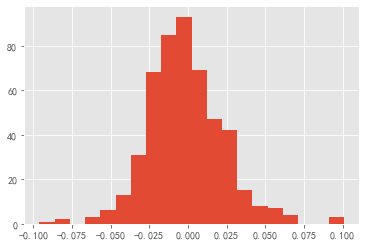

In [303]:
aa['returns'] = aa.close.pct_change()
aa.returns.hist(bins=20)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [90]:
df = ts.get_k_data('hs300',start='2000-01-01').set_index('date')
df['history_return_240'] = (df.close)/(df.close.shift(240))
df['future_return_240'] = (df.close.shift(-240))/(df.close)
df['rocma10'] = df['history_return_240'].rolling(10).mean()
df['d_rocma'] = df['rocma10'] - df['rocma10'].shift(1)


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [91]:
df1 = df.iloc[-1750:]
roc = 0.93

<AxesSubplot:>

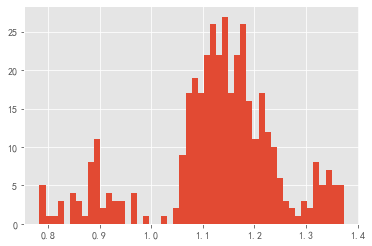

In [92]:
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']>0)]['future_return_240'].hist(bins=50)
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']<0)]['future_return_240'].hist(bins=50,alpha=0.4)
df1[(df1['history_return_240']<=roc)]['future_return_240'].hist(bins=50,alpha=1)

In [96]:
fr = df1[df1['history_return_240']<=roc]['future_return_240'].dropna()
print(np.percentile(fr,[1,5,10,20,50,80,90,95,99]))

[0.79492967 0.88099154 0.91585121 1.07685633 1.14038125 1.21244217
 1.25804753 1.33125277 1.3620961 ]


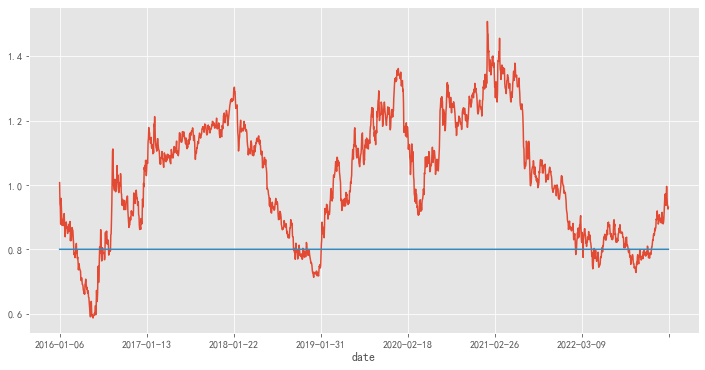

In [97]:
df1.history_return_240.plot(figsize=[12,6])
plt.plot(df1.history_return_240.index,np.ones_like(df1.history_return_240.index)*0.8)

<AxesSubplot:>

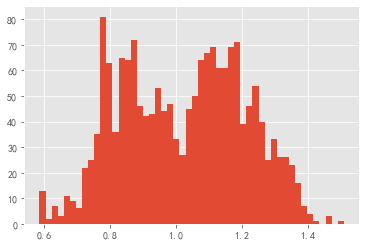

In [69]:
df1['history_return_240'].hist(bins=50)

In [ ]:
df1.close.pctchange()

In [13]:
def peak_amount(a):
    a_mid = a[1:-1]
    a_front = a[0:-2]
    a_bhind = a[2:]
    l1 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] > a_front[i] and a_mid[i] > a_bhind[i]]
    l2 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] < a_front[i] and a_mid[i] < a_bhind[i]]
    print('极大值个数：',len(l1))
    print('极小值个数：',len(l2))
    return len(l1)+len(l2)

In [15]:
peak_amount(df['history_return_240'].rolling(10).mean())

极大值个数： 297
极小值个数： 297


594

In [220]:
aa = ts.get_today_all()
aa = aa[aa.amount>0]
aa['dd'] = aa.changepercent*aa.mktcap/100
aa.sort_values('dd',inplace=True)

[Getting data:]######################################################

In [221]:
aa.head(10)

,code,name,changepercent,trade,open,high,low,settlement,volume,turnoverratio,amount,per,pb,mktcap,nmc,dd
4221,002415,海康威视,-4.314,43.25,45.08,45.17,43.10,45.20,40734614,0.44720,1787516339,23.895,6.201,4.049901e+07,3.939542e+07,-1.747127e+06
1380,601939,建设银行,-0.806,6.15,6.18,6.21,6.13,6.20,46592667,0.48566,287200232,4.805,0.566,1.537568e+08,5.900099e+06,-1.239279e+06
1968,600519,贵州茅台,-0.533,1713.81,1726.00,1733.00,1713.00,1723.00,1036105,0.08248,1788010484,34.324,10.900,2.152884e+08,2.152884e+08,-1.147487e+06
1368,601988,中国银行,-0.847,3.51,3.54,3.55,3.50,3.54,93141308,0.04419,327622779,4.808,0.502,1.033301e+08,7.397870e+07,-8.752061e+05
4808,000858,五 粮 液,-1.119,175.89,178.22,178.50,175.68,177.88,7890690,0.20329,1396164249,29.203,6.361,6.827360e+07,6.827074e+07,-7.639816e+05
1477,601398,工商银行,-0.432,4.61,4.65,4.65,4.61,4.63,79858242,0.02962,369774857,4.753,0.523,1.643033e+08,1.242912e+08,-7.097902e+05
1622,600938,中国海油,-0.584,18.72,18.72,19.22,18.61,18.83,38656196,2.20869,728919633,6.178,1.491,8.904498e+07,3.276347e+06,-5.200227e+05
1447,601628,中国人寿,-0.445,33.58,33.82,34.07,33.54,33.73,4135349,0.01986,140015851,29.456,2.176,9.491288e+07,6.992541e+07,-4.223623e+05
3238,300413,芒果超媒,-5.657,37.36,39.28,39.49,36.81,39.60,19246138,1.88374,731312757,31.932,3.737,6.989013e+06,3.817071e+06,-3.953685e+05
4995,000568,泸州老窖,-1.144,231.62,234.28,235.77,230.80,234.30,2874358,0.19627,668991851,42.656,10.710,3.409418e+07,3.392119e+07,-3.900374e+05


In [222]:
aa.tail(10)

,code,name,changepercent,trade,open,high,low,settlement,volume,turnoverratio,amount,per,pb,mktcap,nmc,dd
621,688072,拓荆科技,17.023,419.96,355.94,424.95,355.94,358.87,2677650,9.51941,1029395944,0.000,14.915,5.311604e+06,1.181277e+06,9.041943e+05
4173,002466,天齐锂业,7.034,82.32,77.20,82.64,77.16,76.91,57178768,3.87762,4615699228,5.304,2.786,1.351054e+07,1.213879e+07,9.503311e+05
672,688012,中微公司,8.732,181.30,171.97,182.00,166.86,166.74,15310956,2.48130,2654884584,95.421,7.225,1.118718e+07,1.118718e+07,9.768642e+05
4178,002460,赣锋锂业,6.949,69.72,65.46,70.82,65.46,65.19,46528400,3.85472,3190518181,6.849,3.193,1.406325e+07,8.415553e+06,9.772550e+05
1391,601899,紫金矿业,3.433,13.86,13.74,13.99,13.69,13.40,131238996,0.63940,1819850925,18.237,4.103,3.649085e+07,2.844806e+07,1.252731e+06
4265,002371,北方华创,10.000,314.61,300.00,314.61,298.50,286.01,15151151,2.87032,4631400016,146.480,8.907,1.665743e+07,1.660687e+07,1.665743e+06
172,688981,中芯国际,4.138,60.40,58.67,60.74,57.38,58.00,51618302,2.63708,3035237331,39.477,3.587,4.784205e+07,1.182271e+07,1.979704e+06
1446,601633,长城汽车,8.701,28.11,26.71,28.25,26.33,25.86,49512130,0.80737,1364922978,30.890,3.678,2.385523e+07,1.723846e+07,2.075643e+06
2911,300750,宁德时代,2.959,399.75,387.90,402.37,387.50,388.26,11702229,0.54248,4660457931,30.946,5.936,9.763952e+07,8.623373e+07,2.889153e+06
1620,600941,中国移动,2.629,97.60,95.10,99.60,94.54,95.10,12254765,1.61540,1200574438,16.599,1.652,2.085494e+08,7.404159e+06,5.482764e+06
